In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)

!pip install xgboost==1.7.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 4.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [2]:
import xgboost as xgb

In [4]:
# LOAD DATASET
# find and copy the path to the 'Florida_Keys.csv' and then you may need to refresh the page to clean it up
#and puts into the dataframe data
file_path = "/content/drive/MyDrive/ML workshop/Florida_Keys.csv"

data=pd.read_csv(file_path)

In [5]:
required_columns = [
    'Date', 'Latitude', 'Longitude',
    'Sea_Surface_Temperature', 'HotSpots',
    'Degree_Heating_Weeks', 'Bleaching_Alert_Area'
]
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"Missing column: {col}")

# Quick preview
print("Data preview:\n", data.head(), "\n")

# 2. SPLIT FEATURES (X) AND TARGET (y)
X = data.drop(columns=["Date", "Bleaching_Alert_Area"])
y = data["Bleaching_Alert_Area"]

# 3. TRAIN/TEST SPLIT, try random_state=42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# 4. TRAIN XGBoost CLASSIFIER
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# 5. PREDICT
y_pred = xgb_model.predict(X_test)

# 6. EVALUATION: ACCURACY AND CLASS REPORT
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Data preview:
          Date  Latitude  Longitude  Sea_Surface_Temperature  HotSpots  \
0  01/01/1985     24.75    -81.625                    24.96       0.0   
1  01/02/1985     24.75    -81.625                    24.95       0.0   
2  01/03/1985     24.75    -81.625                    24.98       0.0   
3  01/04/1985     24.75    -81.625                    24.63       0.0   
4  01/05/1985     24.75    -81.625                    24.35       0.0   

   Degree_Heating_Weeks  Bleaching_Alert_Area  
0                   0.0                     0  
1                   0.0                     0  
2                   0.0                     0  
3                   0.0                     0  
4                   0.0                     0   

Accuracy: 0.9359

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1106
           1       0.86      0.73      0.79       244
           2       0.82      0.86      0.84        5

In [6]:
import matplotlib.pyplot as plt #matplotlib.pyplot for plotting
from sklearn.preprocessing import label_binarize #label_binarize for converting multi-class labels to binary format for ROC calculation
from sklearn.metrics import roc_curve, auc #for computing the ROC curve and area under the curve.

# Binarize the target variable for multi-class ROC
y_test_bin = label_binarize(y_test, classes=xgb_model.classes_) #label_binarize is used to create a binary representation
# of the target variable (y_test) for each class.
y_pred_proba = xgb_model.predict_proba(X_test)  #predict_proba method of the trained Random Forest model (rf_model)
      #is used to get the predicted probabilities for each class for the test data (X_test).

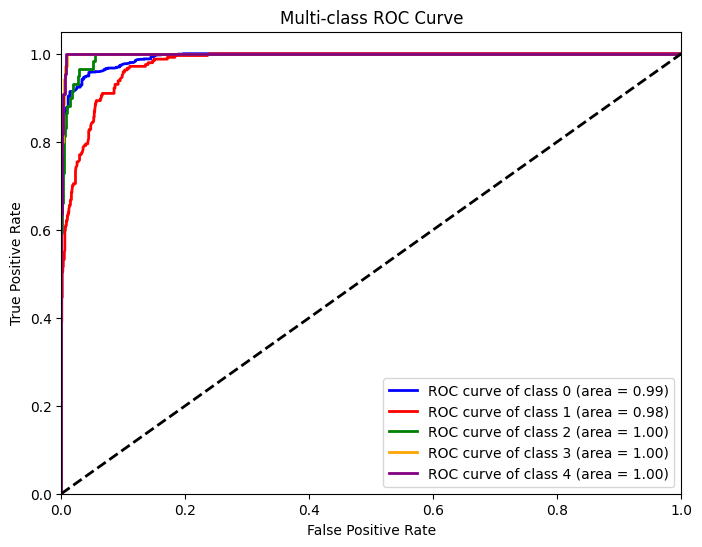

In [7]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #A loop iterates through each class, calculating the false positive rate (fpr), true positive rate (tpr),
    #and area under the curve (AUC) using roc_curve and auc functions. These values are stored in dictionaries for each class.
     # the  _  means that the thresholds are ignored
# Plot ROC curves for each class, #Each curve is labeled with its corresponding class and AUC value.
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(xgb_model.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show() #plt.show() is called to display the generated plot.